# Library Imports

In [385]:
# Library for dataset manipulation
import pandas as pd
# Mathematical functions for arrays
import numpy as np
# Draw graphs based on data
import matplotlib.pyplot as plt
# Heatmap library
import seaborn as sn

# Using sklearn digits dataset
from sklearn.datasets import load_iris
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# Build a text report showing the main classification metrics
from sklearn.metrics import classification_report
# Compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix
# Classifier implementing the k-nearest neighbors vote
from sklearn.neighbors import KNeighborsClassifier

# Loading Dataset

In [386]:
# Setting the dataset
digits = load_digits()

In [387]:
# The possible targets of the dataset
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [388]:
# Loading the database as a table, with the features of each data index as a column
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()
arr = df.to_numpy()
print(arr)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [389]:
# Adding an extra 'target' column, which is the classifier the model is aiming to predict
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Adding the target data to each index of the dataset allows categorise the datapoint of the k-nearest neighbor when classifying each predicted datapoint. 

# Create KNN Model
The KNN Model works by measuring the euclidean distance of the point to its nearest k (in this case 5) neighbors in a multi-dimensional field. The greatest number of k neighbors near the datapoint classifies the data to that category. 

K-NN works best for data that is targetting a categorical result, but using integar, or float values. 

In [390]:
# Splitting the data into randomly selected testing and training subsets, with 30% of the data used as testing, and 70% used as training for the model. 
X_train, X_test, y_train, y_test = train_test_split(np.array(df.drop('target',axis='columns')), np.array(df.target), test_size=0.1)

In [391]:
# Selecting the nearest 5 neighbors of each predicted datapoint in the testing field. 
knn = KNeighborsClassifier(n_neighbors=3)

In [392]:
best = 0

for i in range(100):
    # Fit the k-nearest neighbors classifier from the training dataset
    model = knn.fit(X_train, y_train)
    # Scores the accuracy of the model
    acc = knn.score(X_test,y_test)
    if  acc > best:
        bestx = X_test
        besty = y_test
        best = acc
best

0.9777777777777777

# Confusion Matrix and Classification report
The confusion matrix compares the class the array predicts, against the true class of the data, a perfectly accurate model would only have a value greater than 0 in each corresponding true value and predicted value

In [393]:
# predicted y (target) value
y_pred = knn.predict(bestx)
# Creating a confusion matrix tested y values against actual y values
cm = confusion_matrix(besty, y_pred)
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5]])

Overall, the model can be evaulated as effective in predicting digit patterns, with only a couple values of 1, and a 2 or 3 sometimes. 

Text(58.222222222222214, 0.5, 'Truth')

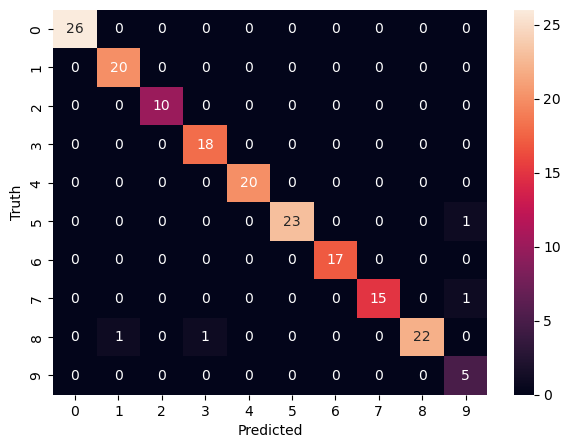

In [394]:
plt.figure(figsize=(7,5))
# Plotting the heatmap with values inside each cell
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Classification Report Definitions

precision - number of true positives divided by the total number of true Positives and False Positives

recall - number of true positives divided by the total number of true positives and false negatives

f1-score - The harmonic mean of precision and recall, taking both false positive and false negatives into account. 

support - the number of occurrences of each particular class in the true responses

accuracy - the number of occurrences of each particular class in the true responses

macro avg - arithmetic mean of all the per-class F1 score

weighted avg -  to the proportion of each class’s support relative to the sum of all support values

In [395]:
# Classification report, tested true value vs predicted value
print(classification_report(besty, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        10
           3       0.95      1.00      0.97        18
           4       1.00      1.00      1.00        20
           5       1.00      0.96      0.98        24
           6       1.00      1.00      1.00        17
           7       1.00      0.94      0.97        16
           8       1.00      0.92      0.96        24
           9       0.71      1.00      0.83         5

    accuracy                           0.98       180
   macro avg       0.96      0.98      0.97       180
weighted avg       0.98      0.98      0.98       180



Each average is around the 98-99% accuracy across each accuracy category, meaning that the model is extremely accurate. 